# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.options.display.max_columns = None

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
sns.set(style='darkgrid')

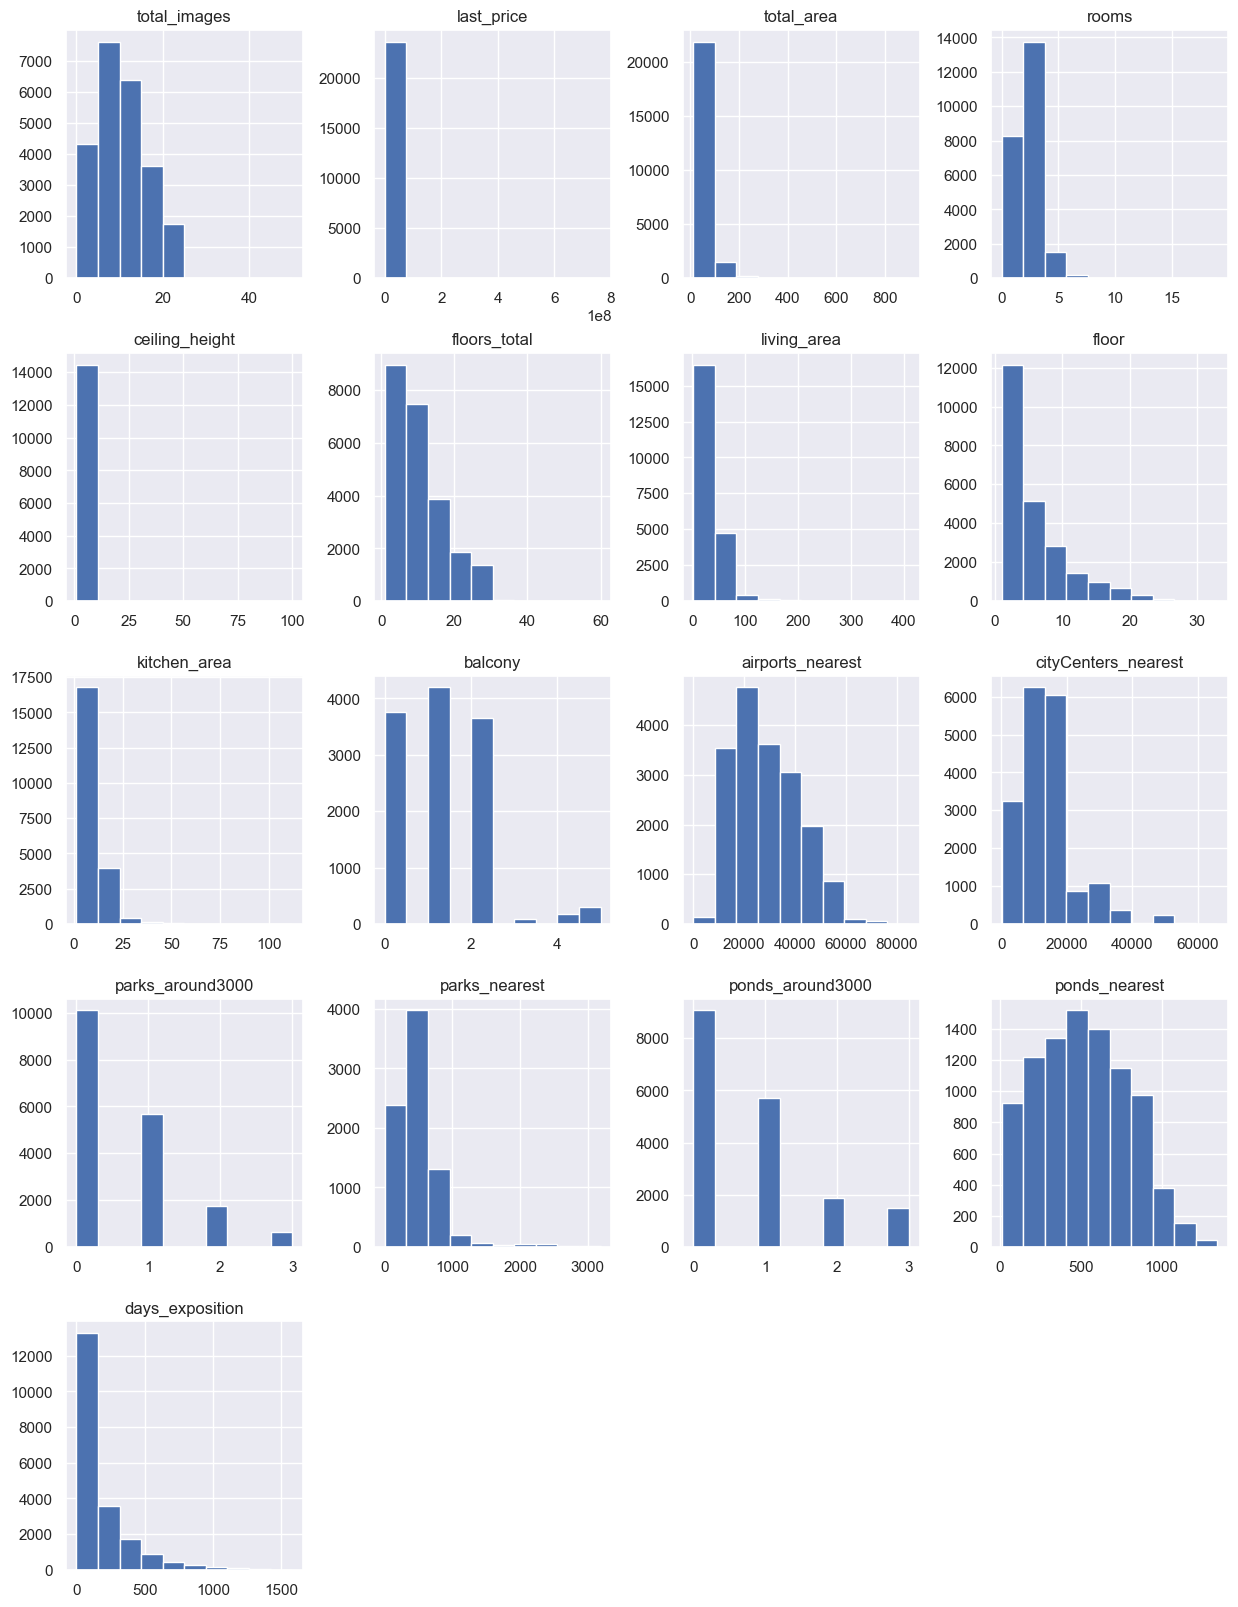

In [9]:
data.hist(figsize=(15, 20));

**ВЫВОД**  

В данных больше количество пропусков, например "Балконы", "высота потолков", близости парков и прудов - тут почти половина пропусков  

У части столбцов неверно определены типы данных. "floors_total", "is_apartment" и "balcony" имеют неправлиьные типы данных.  
Их мы поменяем ниже  
Из аномальных данных выделяются:  
- цена - 763'000'000 ₽  
- общая площадь - 900 кв.м  
- количество комнат - 19 шт.  
- максимальная высота потолка - 100м  
- 5 балконов :)  

Почти у всех параметров среднее и медианное значение не сильно отстают друг от друга - это хороший знак, нужные нам данные в хорошем состоянии. Некоторые параметры выбиваются, но мы уже говорили, что например картографические данные имеют большое кол-во пропусков.  
Всё это исправим позже

### Предобработка данных

Найдём колонки с пропусками и определим их количество

In [10]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ВЫСОТА ПОТОЛКОВ**

In [11]:
data[data['ceiling_height'].isnull()].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0


**ВСЕГО ЭТАЖЕЙ В ДОМЕ**

In [12]:
data.query('floors_total.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0


**ЖИЛАЯ ПРОЩАДЬ**

In [13]:
data.query('living_area.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [14]:
data.query('living_area <= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,NaN,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


По мимо квартир с "пропуском" в жилой площади, так же есть объявления с подозрительно малой площадью жилых кв. метров. Например есть квартира с общей площадью 139кв.м., 3 комнатами и 16 кв.м кухни, но "жилых квадратов" всего 3.
Что делать с такими объявлениями, я не был уверен. я их просто оставил. т.к. решил, что усреднять и применять медиану, допустим группируя жилье по квадратуре или стоимости - не правильно

**ПЛОЩАДЬ КУХНИ**

In [15]:
data.query('kitchen_area.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0


In [16]:
print(f'Количество студий у которых не указана площадь кухни: {len(data.query("kitchen_area.isnull() and studio == True"))}')

Количество студий у которых не указана площадь кухни: 149


In [17]:
print(f'Количество квартир с открытой планировкой у которых не указана площадь кухни: {len(data.query("kitchen_area.isnull() and open_plan == True"))}')

Количество квартир с открытой планировкой у которых не указана площадь кухни: 67


Выше посчитали сколько квартир студий и квартир с открытой планировкой мы имеем к объявлений с пропусками в площади кухни. Можно было предположить, что для студий и "open_plan" квартир плодаъь кухни равна нулю. Так мы и поступим. Хоть чуть-чуть, но заполним пропуски

**НАЗВАНИЕ НАСЕЛЕННОГО ПУНКТА**

In [18]:
data.query('locality_name.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0


**РАССТОЯНИЕ ДО АЭРОПОРТА**

In [19]:
data.query('airports_nearest.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


**РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА**

In [20]:
data.query('cityCenters_nearest.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


**ЧИСЛО ПАРКОВ В РАДИУСЕ 3 КМ**

In [21]:
data.query('parks_around3000.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


In [22]:
data.query('parks_around3000.isnull()').isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2575
floors_total              10
living_area              623
floor                      0
is_apartment            4890
studio                     0
open_plan                  0
kitchen_area             715
balcony                 2710
locality_name              8
airports_nearest        5518
cityCenters_nearest     5518
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition          865
dtype: int64

In [23]:
data.query('parks_nearest.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [24]:
data.query('ponds_around3000.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


In [25]:
data.query('ponds_nearest.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [26]:
data.query('days_exposition.isnull()').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Между некоторыми параметрами есть связь, так например

Часть данных не заполнена по группам параметров, так например картографические параметры одовременно не заполнены в 5518 объявлениях:  
- расстояние до ближайшего аэропорта  
- расстояние до центра города  
- число парков в радиусе 3км  
- расстояние до ближайшего парка  
- число водоёмов в радиусе 3 км  
- расстояние до ближайшего водоёма  

Возможно произошла ошибка с определением геолокации. Может быть система не смогла понять, что за населенные пункты указаны. Может быть по названию не определить, где именно находится квартира. Хотя, скорее всего дело в чём-то другом

**ОБЩАЯ ПЛОЩАДЬ КВАРТИРЫ**

Проверим, есть ли объявления, в которых общая площадь меньше жилой или площади кухни

In [27]:
print(f'Количество объявлений с ошибкой: {len(data.query("total_area < kitchen_area or total_area < living_area"))}')

Количество объявлений с ошибкой: 0


Тут всё в порядке 👍

**СРОК РАЗМЕЩЕНИЯ ПУБЛИКАЦИИ**

In [28]:
data.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10132,2,16137000.0,154.76,2014-11-27T00:00:00,4,2.70,20.0,67.81,20,NaN,False,False,32.55,0.0,Санкт-Петербург,18490.0,17492.0,0.0,NaN,2.0,113.0,573.0
8393,10,8037000.0,56.20,2014-11-27T00:00:00,1,NaN,5.0,24.20,5,False,False,False,12.90,0.0,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,972.0
15857,6,25000000.0,145.20,2014-11-27T00:00:00,3,NaN,5.0,60.70,5,NaN,False,False,40.20,NaN,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
2831,9,5990000.0,64.40,2014-11-27T00:00:00,2,3.12,4.0,36.20,1,NaN,False,False,14.60,0.0,Санкт-Петербург,24668.0,5236.0,1.0,366.0,0.0,NaN,1069.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,False,False,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,20,10000000.0,62.30,2019-05-03T00:00:00,2,NaN,6.0,20.00,3,NaN,False,False,30.00,NaN,Санкт-Петербург,25083.0,3148.0,2.0,629.0,0.0,NaN,NaN
5986,0,5000000.0,48.00,2019-05-03T00:00:00,3,2.50,9.0,NaN,2,NaN,False,False,NaN,NaN,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN
9217,7,4300000.0,35.70,2019-05-03T00:00:00,1,2.70,21.0,15.00,12,False,False,False,13.00,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21887,0,5600000.0,61.60,2019-05-03T00:00:00,3,2.50,9.0,42.00,5,NaN,False,False,8.30,NaN,Санкт-Петербург,36326.0,10641.0,1.0,637.0,0.0,NaN,NaN


In [29]:
data.query('days_exposition.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,False,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(f'Часть ({data["days_exposition"].isnull().sum()} шт.) публикаций не имеют данных о количестве дней размещения объявлений. Возможная причина - публикация ещё не снята. С такими данными ничего делать не будем')

Часть (3181 шт.) публикаций не имеют данных о количестве дней размещения объявлений. Возможная причина - публикация ещё не снята. С такими данными ничего делать не будем


#### Заполняем пропуски

**Балконы**

В задании давали подсказу, что незаполенный параметр у Балконов - почти всегда можно принять, как отсутствие балкона. Так и поступим. Заполняем NaN - нулями

In [31]:
data['balcony'] = data['balcony'].fillna(0)

**Всего этажей в доме**

Посмотрим на объявление, где не указан этот параметр

In [32]:
data.query('floors_total.isnull()').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,False,False,12.30,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,False,False,12.00,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Примим, что кол-во этажей в доме равно этажу на котором находится квартира

In [33]:
data.loc[data['floors_total'].isnull(), 'floors_total'] = \
    data.loc[data['floors_total'].isnull(), 'floor']

**Площадь кухни**

Примим, что квартиры с открытой планировкой и студии не имеют площадъ кухни

In [34]:
data.loc[(data['kitchen_area'].isna()) & (data['open_plan'] == True), 'kitchen_area'] = 0

In [35]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0

**Высота потолков**

Посмотрим, сколько объявлений с аномально высокими потолками

In [36]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [37]:
f'Всего таких объявлений: {len(data.query("ceiling_height > 20"))}'

'Всего таких объявлений: 22'

Есть рекордсмен! 100 метров! Если поделим высоту на 10, получим 10метров. При цене квартиры в 15'000'000, 25кв.м. общей площади и на достаточном удалении от центра, можно сказать, что скорее всего 10 м. там и есть, возможно это такое двухэатжное решение со вторым светом
Пересчитаем эти аномальные значения!

In [38]:
data.loc[data['ceiling_height']  > 20, 'ceiling_height'] = \
    data.loc[data['ceiling_height']  > 20, 'ceiling_height']/10

А теперь заполним пропуски средним значением, т.к. оснавная часть данных находится в небольшом диапазоне

In [39]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

**Ошибка в полученных картографических данных**

На первый взгляд с 5518 объявлениями в которых отсутствую картографические данные (parks_around3000, ponds_around3000) можно проставить ноль.
Но что, если попробовать сгруппировать данные по населенным пунктам у казать среднее значение?!
Правда цена жилья сильно зависит от удалённости от центра, расстояния до парков и водоёмов.
1. нужно убрать неявные дубликаты в названиях населенных пунктов
2. сгруппировать данные по населенным пунктам и для каждых столбцов с пропусками добавить среднее значение

Но я сомневаюсь, что это правильно. Цена кв.м. от этого исказится

*Обрабатываем населённые пункты*

Т.к в задании сказано не удалять пропуски. Оставляем пропуски

Переводим текст названия в нижний регист

In [40]:
data['locality_name'] = data['locality_name'].str.lower()

Создаём функцию, которая унифицирует некоторые варианты написания населенных пунктов

In [41]:
def processing_loc_name(row):
    try:
        row = row.replace('ё', 'е')
        row = row.replace('поселок городского типа', 'поселок')
        row = row.replace('городской поселок', 'поселок')
        row = row.replace('коттеджный поселок', 'поселок')
        return row
    except:
        pass

In [42]:
data['locality_name'] = data['locality_name'].apply(processing_loc_name)

In [43]:
cartography_mean = data.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'])
cartography_mean

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
locality_name,,,,,,
зеленогорск,73300.250000,54617.583333,1.916667,210.625000,0.875000,485.888889
колпино,26375.863501,32113.771513,0.522255,495.481203,0.997033,532.268421
красное село,26595.579545,30020.284091,0.494318,466.086957,0.090909,445.500000
кронштадт,67469.263158,49195.726316,1.789474,324.574713,1.936842,343.413793
ломоносов,48308.280303,50739.969697,0.242424,389.062500,1.128788,550.048193
павловск,21053.342105,33206.921053,1.552632,379.538462,1.842105,493.382353
петергоф,40184.676617,35468.925373,1.338308,419.559441,1.308458,513.367521
поселок александровская,12896.500000,27468.000000,0.000000,NaN,1.000000,711.500000
поселок белоостров,57769.000000,38868.000000,0.000000,NaN,1.000000,320.000000


*airports_nearest - расстояние до ближайшего аэропорта*

In [44]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].mean()

*cityCenters_nearest - расстояние до центра города*

In [45]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].mean()

*parks_around3000 - расстояние до центра города*

In [46]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_around3000'].isna()), 'parks_around3000'] = \
    data.loc[(data['locality_name'] == t), 'parks_around3000'].mean()

*parks_nearest - расстояние до центра города*

In [47]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].mean()

*ponds_around3000 - расстояние до центра города*

In [48]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
    data.loc[(data['locality_name'] == t), 'ponds_around3000'].mean()

*ponds_nearest - расстояние до центра города*

In [49]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].mean()

**Апартаменты**

Посмотрим, что можем сделать с пропусками у аппартаментов

In [50]:
print(f'''Всего объявлений: {len(data)};
из них апартаменты: {data["is_apartment"].value_counts()[1]}; 
квартиры: {data["is_apartment"].value_counts()[0]};
не указано у: {data["is_apartment"].isnull().sum()}''')

Всего объявлений: 23699;
из них апартаменты: 50; 
квартиры: 2725;
не указано у: 20924


Посмотрим рейтинг городов по количеству объявлений

In [51]:
data['locality_name'].value_counts()

санкт-петербург                    15721
поселок мурино                       556
поселок шушары                       440
всеволожск                           398
пушкин                               369
                                   ...  
поселок белоостров                     1
деревня пельгора                       1
поселок каложицы                       1
поселок платформа 69-й километр        1
поселок дзержинского                   1
Name: locality_name, Length: 321, dtype: int64

Посмотрим, какие типы квартир есть в самом большом населенном пункте

In [52]:
data.query('locality_name == "санкт-петербург"')['is_apartment'].value_counts()

False    1794
True       39
Name: is_apartment, dtype: int64

Мне кажется, что нельзя принять, что все пропуски - это значение False, в деревнях и посёлках врядли есть апартаменты, да и в Санкт-Петербурге не все объявления - квартиры.
Но мы это сделаем, скажем, что все пропуски - это квартиры

In [53]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Меняем типы данных

Столбцы "floors_total", "is_apartment" и "balcony" имеют неправлиьные типы данных.

floors_total - *общее кол-во этажей в здании* - целое число (сейчас float64)

is_apartment - *апартаменты (булев тип)* - булевое значение (сейчас object)

balcony - *количество балконов* - целое число (сейчас float64)

In [54]:
data['floors_total'] = data['floors_total'].astype('int64')

In [55]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [56]:
data['balcony'] = data['balcony'].astype('int64')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21637 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Т.к. по заданию мы не удаляем пропуски, а пытаемся их заменить значением или в противном случае оставить,как есть. То я не удаляю оставшиеся пропуски

Проверим параметры стоимости, общей площади и количества комнат. Создадим новый датафрейм без анамальных значений

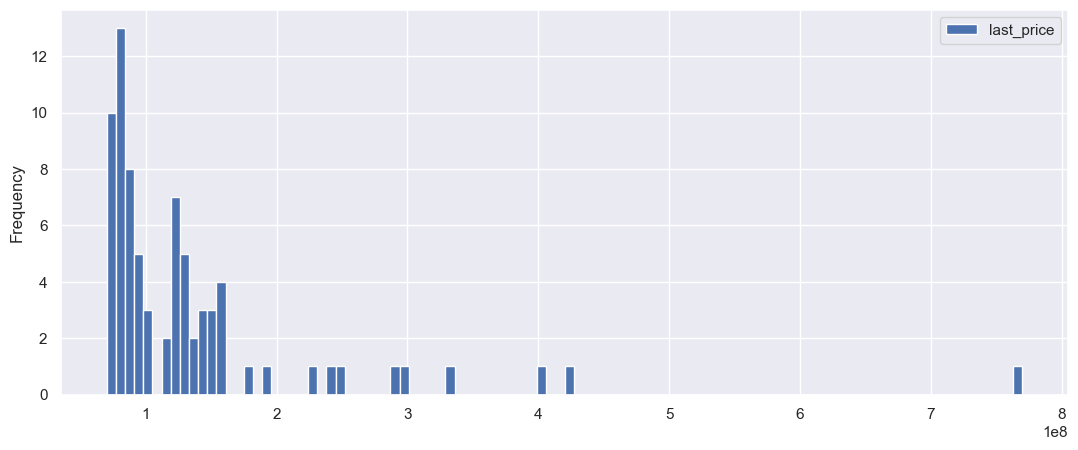

In [58]:
data.plot(
    kind='hist',
    y='last_price',
    histtype='bar',
    range=(70000000,770000000),
    bins=100,
    grid=True,
    legend=True,
    figsize=(13,5)
);

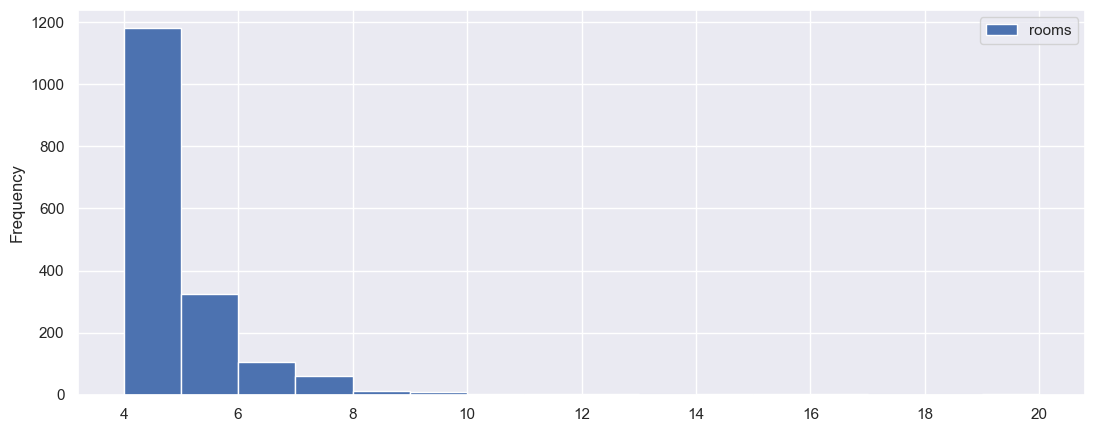

In [59]:
data.plot(
    kind='hist',
    y='rooms',
    histtype='bar',
    range=(4,20),
    bins=16,
    grid=True,
    legend=True,
    figsize=(13,5)
);

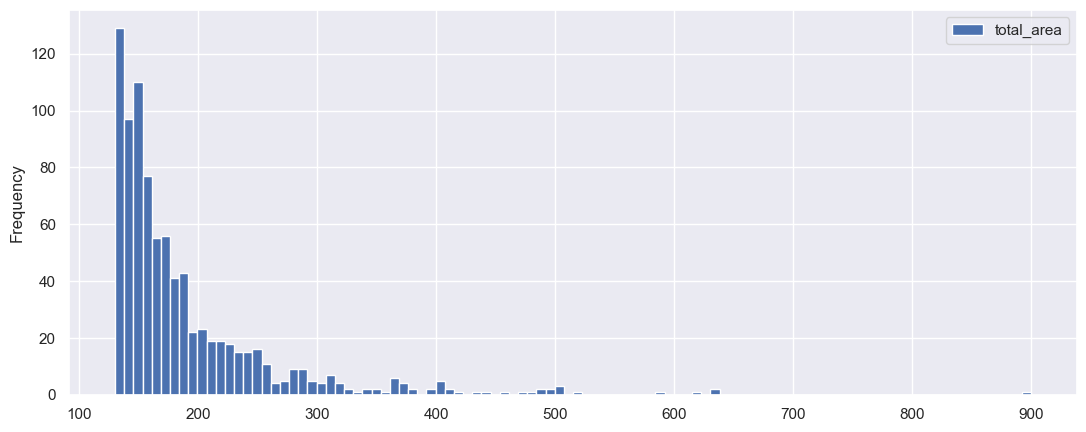

In [60]:
data.plot(
    kind='hist',
    y='total_area',
    histtype='bar',
    range=(130,900),
    bins=100,
    grid=True,
    legend=True,
    figsize=(13,5)
);

Сохраним длинну изначально массива чтобы проверить не перешли ли мы "критические" 10 % при отбрасывании аномалий:

In [61]:
len_old_data = data.shape[0]

In [62]:
data = data.query('last_price < 50000000 and rooms <5 and total_area <130').copy()

In [63]:
print(f'Проверим, сколько осталось данны, после отбрасывания аномалий: {round(data.shape[0] / len_old_data*100, 2)} %')

Проверим, сколько осталось данны, после отбрасывания аномалий: 95.73 %


### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [64]:
data['cost_per_mert'] = data['last_price'] / data['total_area']

**День недели публикации объявления**

In [65]:
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

**Месяц публикации объявления**

In [66]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

**Год публикации объявления**

In [67]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [68]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_mert,week_day,month,year
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.000000,2.0,755.000000,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.730849,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.730849,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.000000,2.0,574.000000,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.000000,1.0,48.000000,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.730849,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.730849,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,501.100000,0.0,598.071429,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.730849,24,NaN,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0.0,498.597886,0.0,520.213955,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.730849,27,15.43,26,False,False,False,8.81,0,поселок мурино,51553.0,21888.0,0.0,NaN,2.0,133.000000,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,498.597886,0.0,520.213955,289.0,88524.590164,6,2,2017
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.670000,12,20.30,3,False,False,False,8.50,0,санкт-петербург,38357.0,13878.0,1.0,310.000000,2.0,553.000000,137.0,127525.252525,3,11,2017


**Тип этажа квартиры**

In [69]:
data[['floors_total','floor']].head(3)

,floors_total,floor
0,16,8
1,11,1
2,5,4


In [70]:
def type_of_floor_lvl(floors_total, floor):
    try:
        if floor == 1:
            return 'первый'
        elif floors_total == floor:
            return 'последний'
        return 'другой'
    except:
        return 'другой'

In [71]:
data['type_of_floor_lvl'] = data.apply(lambda x: type_of_floor_lvl(x.floors_total, x.floor), axis=1)

In [72]:
data['type_of_floor_lvl'].value_counts()

другой       16654
последний     3206
первый        2826
Name: type_of_floor_lvl, dtype: int64

Получается, что данные в столбце немного не искажены из-за того, что пропуски в "floors_total" были заполнены значением из "floor"

Мы видим, что количесто объявлений на первом и последнем этаже отстают друг от друга не так сильно, как от "других" этажей

**Расстояние до центра города в километрах**

In [73]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0)

In [74]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_mert,week_day,month,year,type_of_floor_lvl,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.730849,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.730849,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.730849,12,14.4,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов

**Общая площадь**

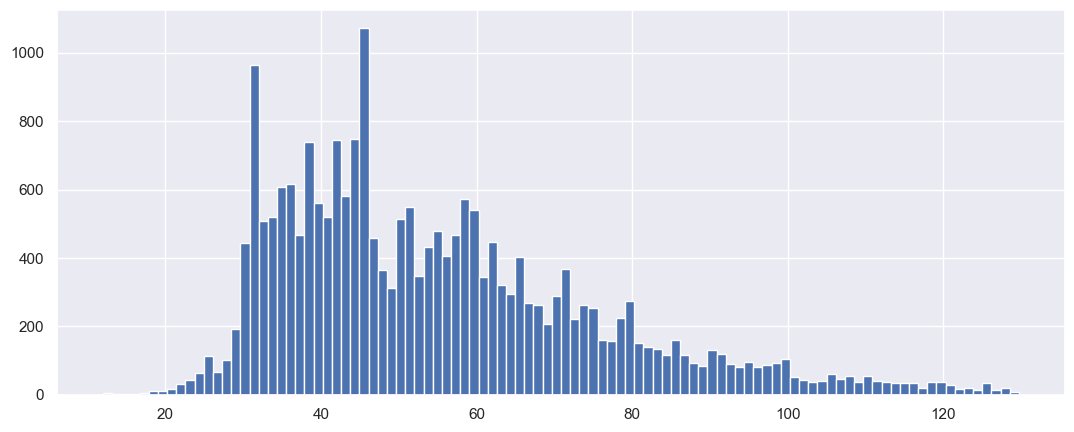

In [75]:
data['total_area'].hist(bins=100, figsize=(13,5)); 

В графике легко узнаётся Распределние Пуассона - подавляющее большенство объявлений - квартиры от 30 до 100 кв.метров

**Жилая площадь**

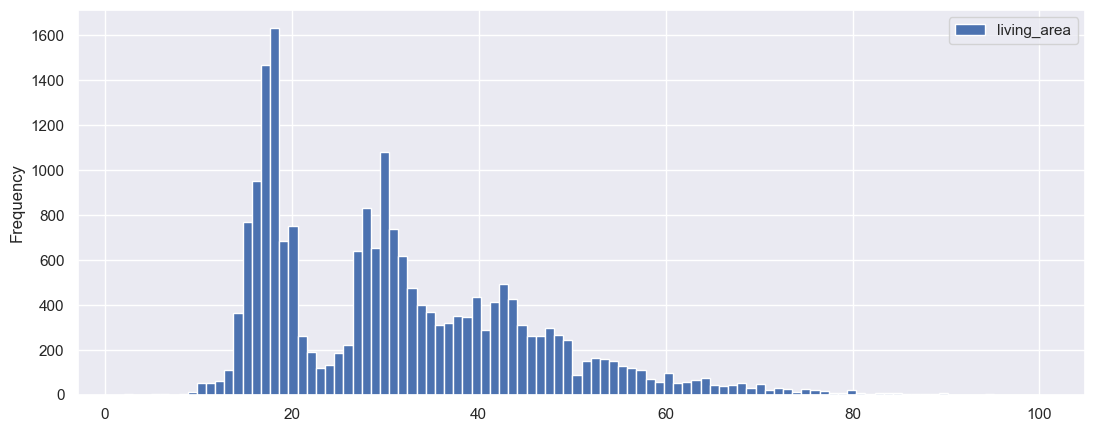

In [76]:
data.plot(
    kind='hist',
    y='living_area',
    histtype='bar',
    
    bins=100,
    grid=True,
    legend=True,
    figsize=(13,5)
);

Данные разрознены, тут мы не видем правильной структуры у графика.
Давайте проверим корреляцию общей и жилой пложади, а так же построим график по этим столбцам

In [77]:
print(f"Корреляция равна: {data['total_area'].corr(data['living_area'])}")


Корреляция равна: 0.9069862477755857


Почти единица - взаимосвязь общей площади и жилой площади очень сильная. Это и логично. Зачем ещё увеличивать квадратуру, если жилая часть не будет увеличиваться?! 

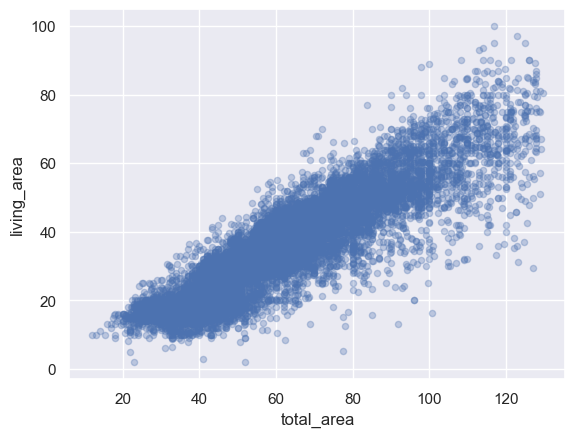

In [78]:
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3);

**площадь кухни**

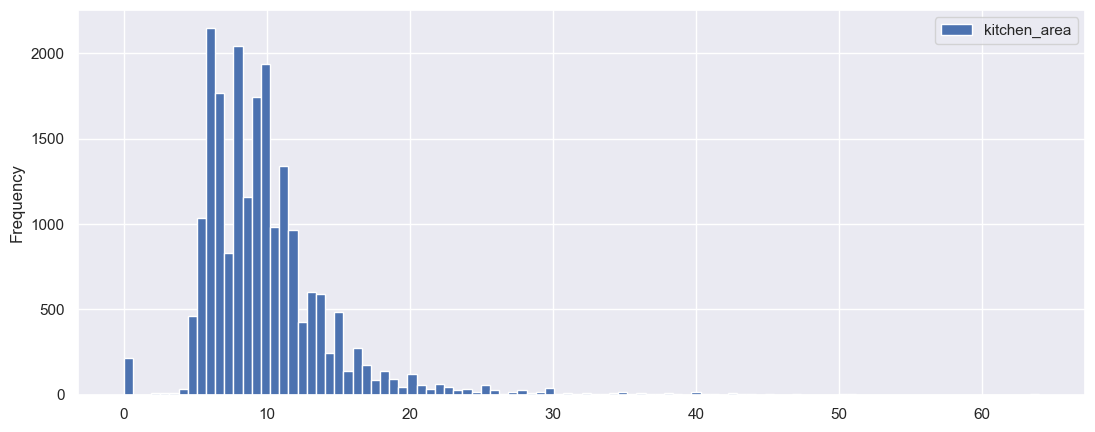

In [79]:
data.plot(
    kind='hist',
    y='kitchen_area',
    histtype='bar',
    
    bins=100,
    grid=True,
    legend=True,
    figsize=(13,5)
);

Графие имеет более правильную форму распределения Пуасона, чем жилая площадь. Так же видел вспласк в нуле - в открытых планировках нет кухни?!

In [80]:
data.query('kitchen_area == 0')['studio'].value_counts()

True     149
False     65
Name: studio, dtype: int64

In [81]:
data.query('kitchen_area == 0')['open_plan'].value_counts()

False    149
True      65
Name: open_plan, dtype: int64

Нет, повально квартир студий и открытых планировок с отсутствием кухон нет

**цена объекта**

In [82]:
data['last_price'].sort_values()

8793        12190.0
17456      430000.0
14911      430000.0
16274      440000.0
5698       450000.0
            ...    
22633    47500000.0
19229    47700000.0
7136     48000000.0
18770    49000000.0
10001    49500000.0
Name: last_price, Length: 22686, dtype: float64

немного поигравшись с диапазоном так же видим форму распределения Пуассона

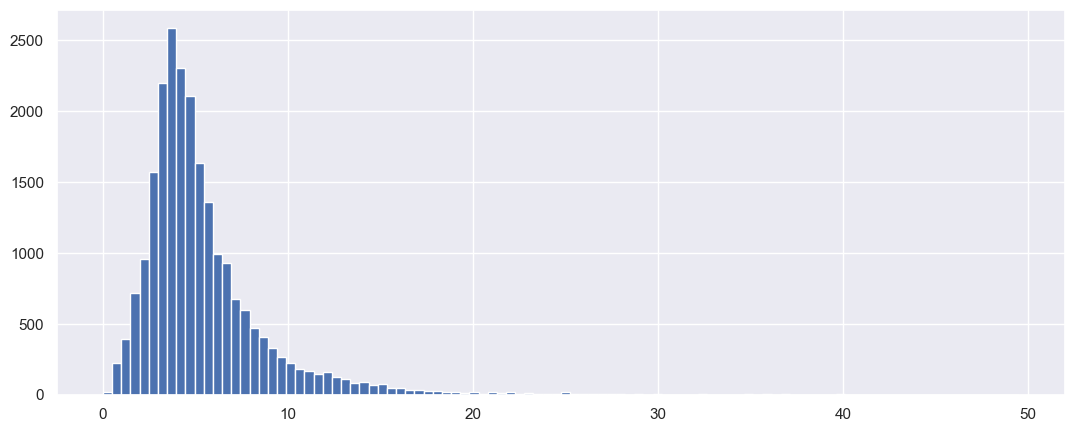

In [83]:
pd.Series(data['last_price']/1000000).hist(bins=100, figsize=(13,5)); 

**количество комнат**

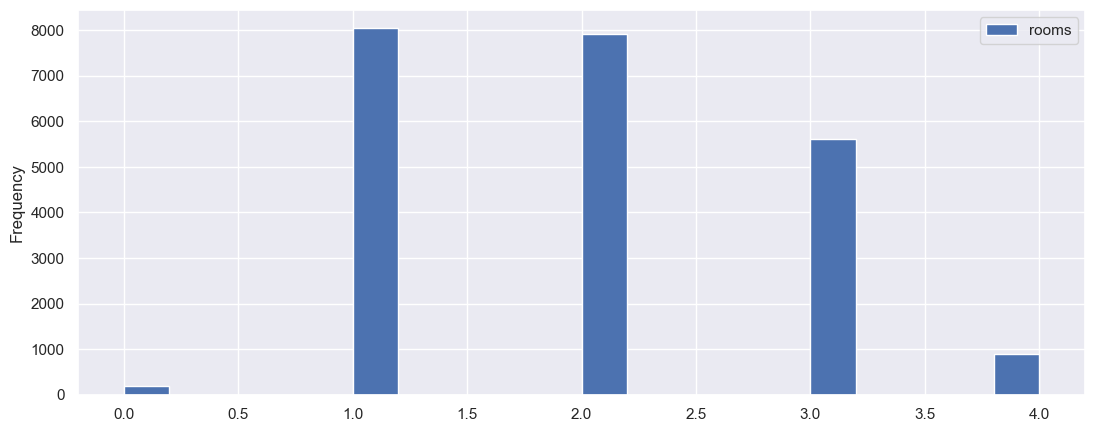

In [84]:
data.plot(
    kind='hist',
    y='rooms',
    histtype='bar',
    
    bins=20,
    grid=True,
    legend=True,
    figsize=(13,5)
);

Так же видим график распределения Пуассона

**высота потолков**

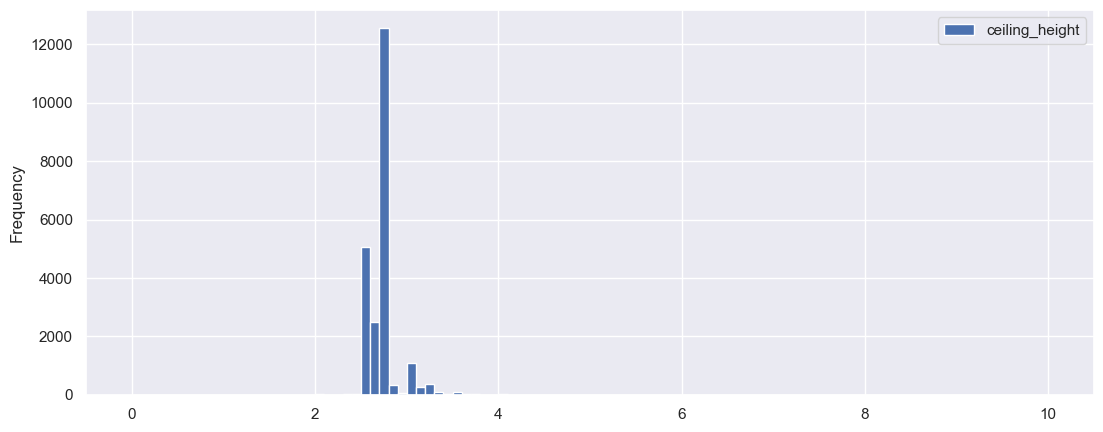

In [85]:
data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='bar',
    range=(0,10),
    bins=100,
    grid=True,
    legend=True,
    figsize=(13,5)
);

В зависимости от того, какой взять диапазон и количество корзин зрафик меняет свое представление от распределения Пуассона до графика с хаотичным распределеним

**этаж квартиры**

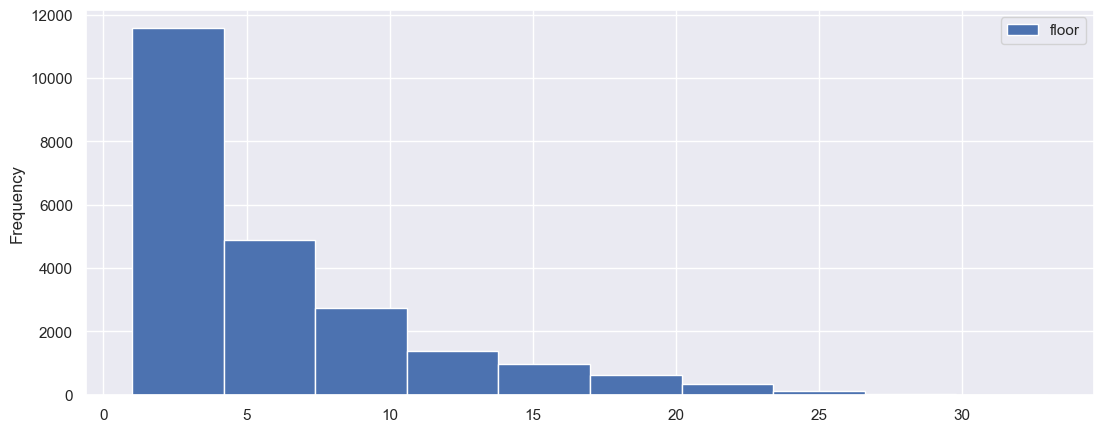

In [86]:
data.plot(
    kind='hist',
    y='floor',
    histtype='bar',
    
    grid=True,
    legend=True,
    figsize=(13,5)
);

Видим, что приобладают квартиры на малых этажах. Это следстие жилого фонда, думаю, что график общего окл-ва этажей покажет акую же картину

**тип этажа квартиры**

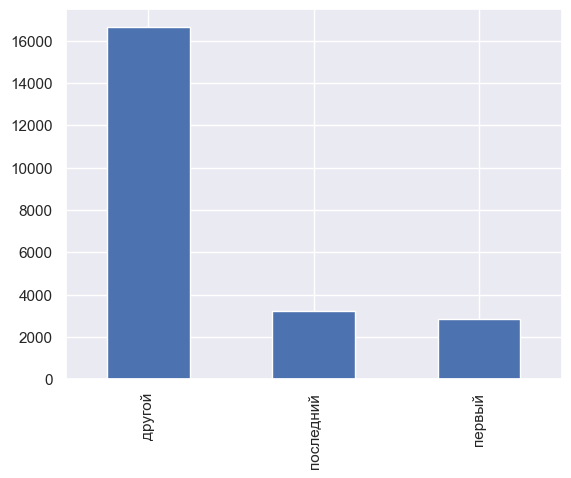

In [87]:
data['type_of_floor_lvl'].value_counts().plot.bar();

**общее количество этажей в доме**

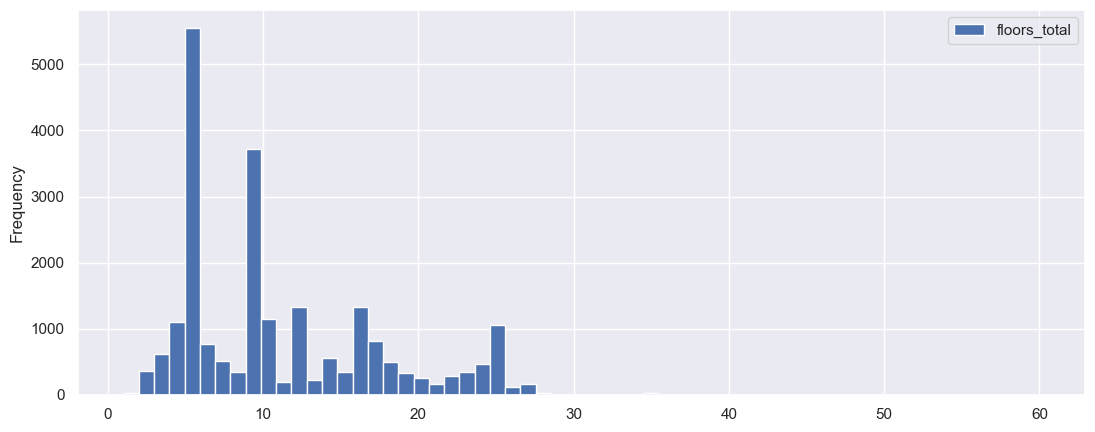

In [88]:
data.plot(
    kind='hist',
    y='floors_total',
    histtype='bar',
    
    bins=60,
    grid=True,
    legend=True,
    figsize=(13,5)
);

5-ти, 9-ти, 12-ти, 16-ти и 11-ти этажки преобладают. Видно, что 5-ти и 9-ти этажек больше остальных в несколько раз

**расстояние до центра города в метрах**

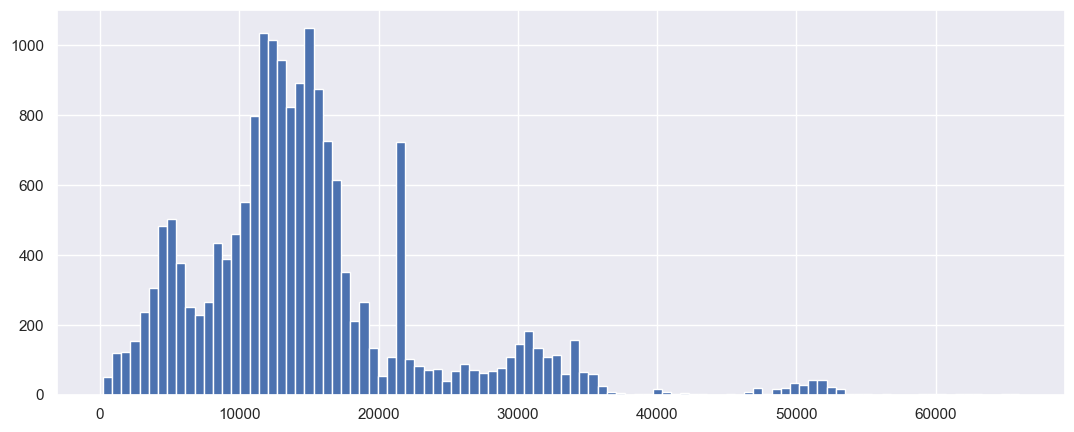

In [89]:
data['cityCenters_nearest'].hist(bins=100, figsize=(13,5)); 

**расстояние до ближайшего аэропорта**

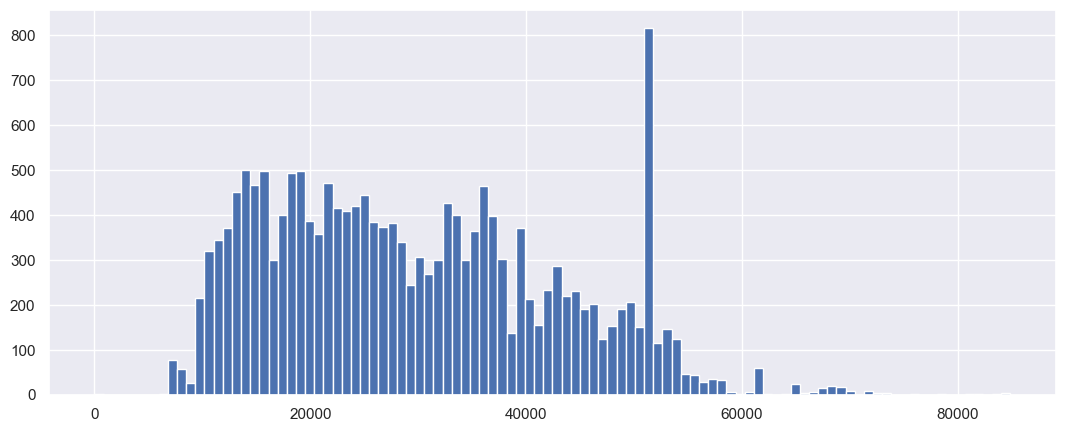

In [90]:
data['airports_nearest'].hist(bins=100, figsize=(13,5)); 

Большинство объявлений имеют показатель от 10км до 55км

**расстояние до ближайшего парка**

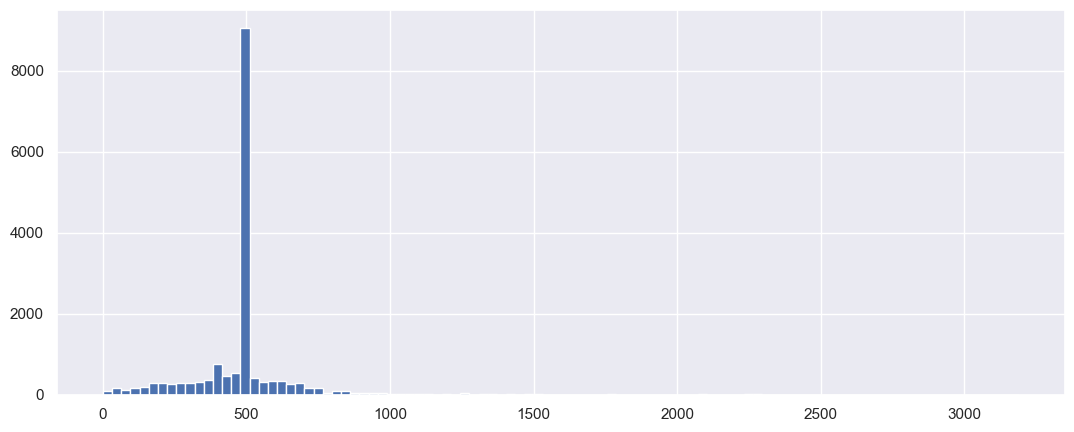

In [91]:
data['parks_nearest'].hist(bins=100, figsize=(13,5)); 

Всплеск в районе 500м - скорее всего это наше устредненное значение, которым мы заменяли пропуски

**день и месяц публикации объявления**

In [92]:
pd.DatetimeIndex(data['first_day_exposition']).day.astype(str) + '/' +  data['month'].astype(str)

0         7/3
1        4/12
2        20/8
4        19/6
5        10/9
         ... 
23693     5/8
23695    15/1
23696    11/2
23697    28/3
23698    21/7
Length: 22686, dtype: object

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22686 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            22686 non-null  int64  
 1   last_price              22686 non-null  float64
 2   total_area              22686 non-null  float64
 3   first_day_exposition    22686 non-null  object 
 4   rooms                   22686 non-null  int64  
 5   ceiling_height          22686 non-null  float64
 6   floors_total            22686 non-null  int64  
 7   living_area             20899 non-null  float64
 8   floor                   22686 non-null  int64  
 9   is_apartment            22686 non-null  bool   
 10  studio                  22686 non-null  bool   
 11  open_plan               22686 non-null  bool   
 12  kitchen_area            20736 non-null  float64
 13  balcony                 22686 non-null  int64  
 14  locality_name           22639 non-null

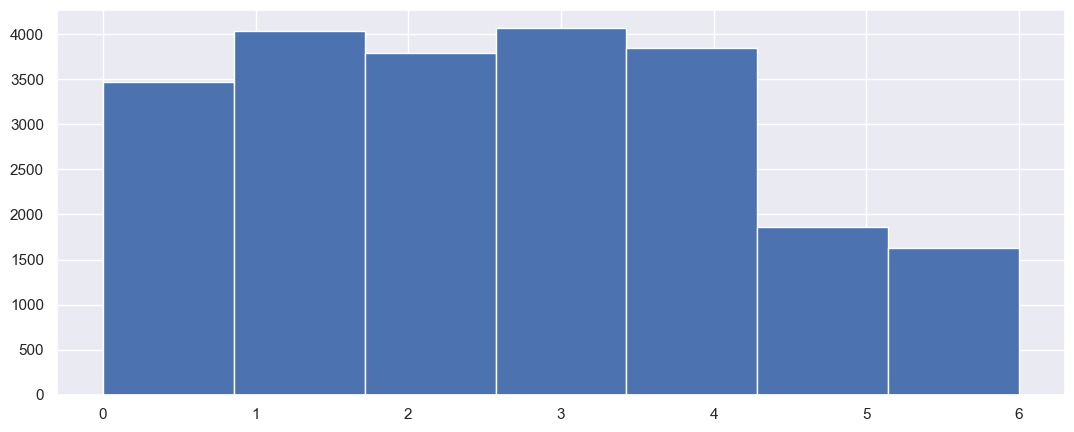

In [94]:
data['week_day'].hist(bins=7, figsize=(13,5)); 

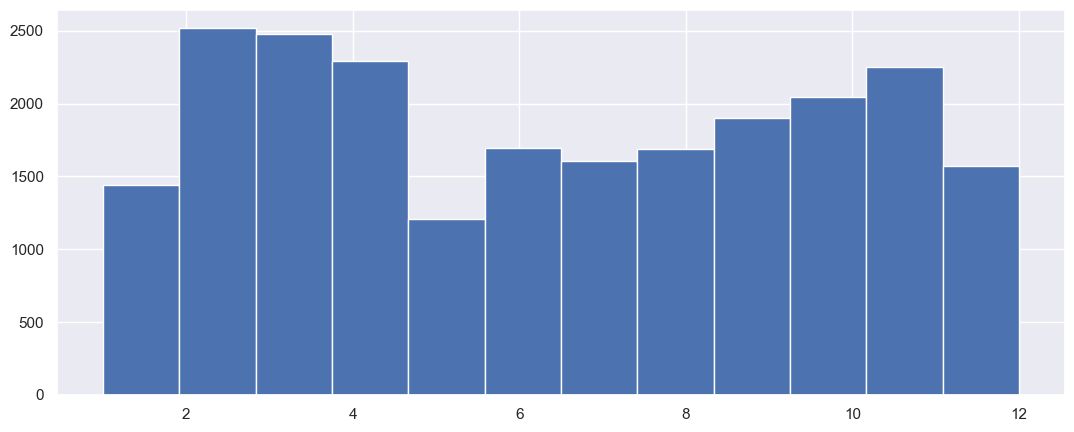

In [95]:
data['month'].hist(bins=12, figsize=(13,5)); 

#### Изучите, как быстро продавались квартиры

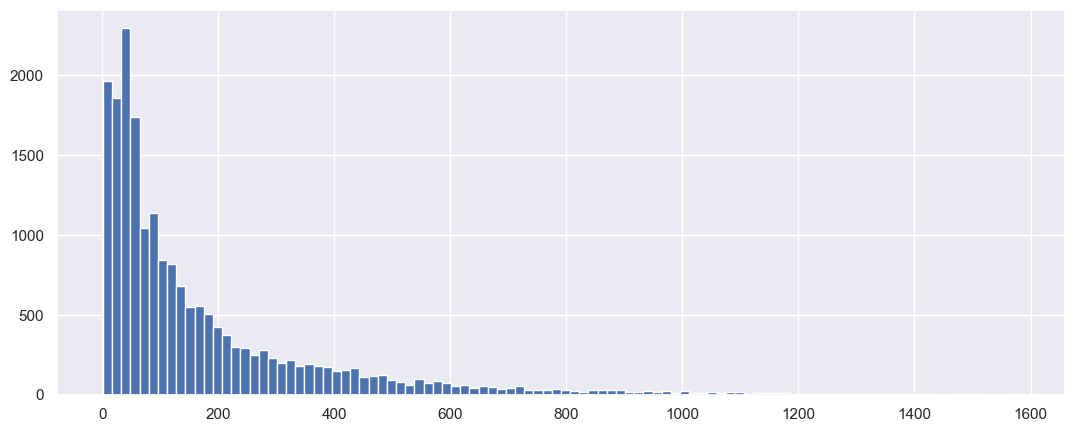

In [96]:
data['days_exposition'].hist(bins=100, figsize=(13,5)); 

In [97]:
f"Среднее значение: {data['days_exposition'].mean()}, медиана: {data['days_exposition'].median()}"

'Среднее значение: 176.24491654021244, медиана: 93.0'

In [98]:
data['days_exposition'].describe()

count    19770.000000
mean       176.244917
std        214.758374
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по расчетам, в среднем продажа занимает до полугода (180 дней), но следует использовать медианные данные - 95 дней.

Быстрые продажи - до 45 дней

Долгие продажи свыше 232 дней

#### Какие факторы больше всего влияют на общую (полную) стоимость?

**общая площадь**

Корреляция стоимости с общей площадью: 0.711500332969694


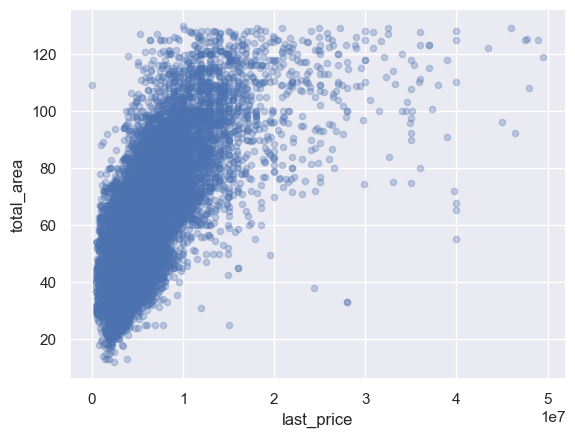

In [99]:
print(f"Корреляция стоимости с общей площадью: {data['last_price'].corr(data['total_area'])}")
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

**жилая площадь**

Корреляция стоимости с жилой площадью: 0.579138485385308


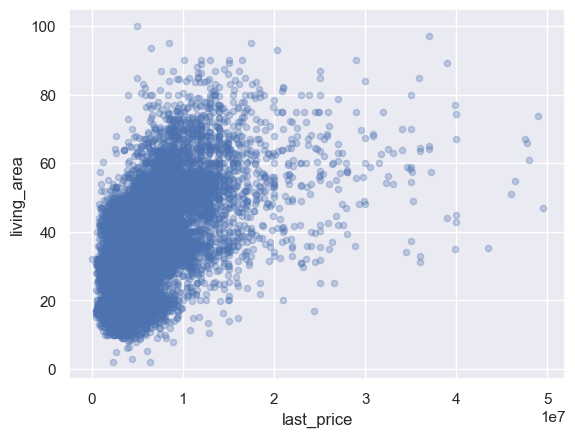

In [100]:
print(f"Корреляция стоимости с жилой площадью: {data['last_price'].corr(data['living_area'])}")
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3); 

**площадь кухни**

Корреляция стоимости с площадью кухни: 0.55



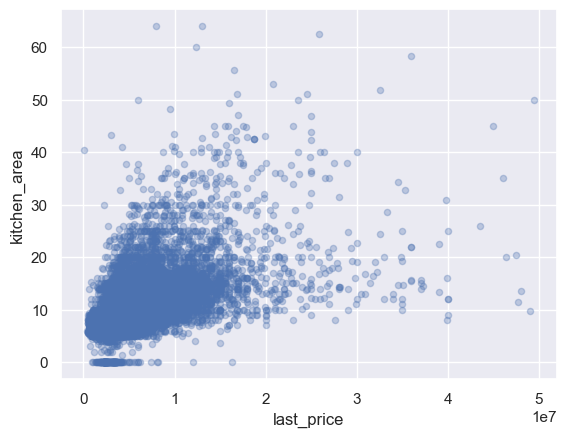

In [101]:
print(f"Корреляция стоимости с площадью кухни: {round(data['last_price'].corr(data['kitchen_area']), 2)}\n")
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3); 

**количество комнат**

Корреляция стоимости с количеством комнат: 0.4



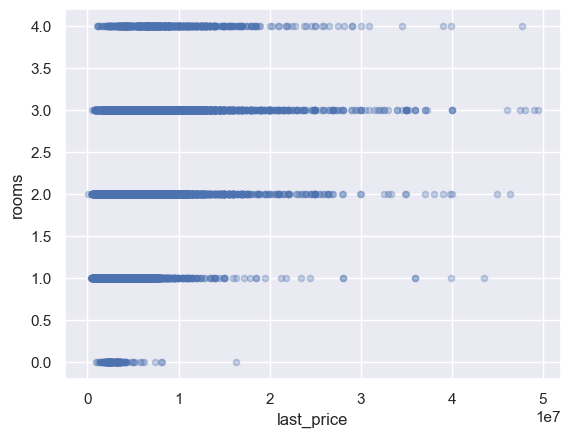

In [102]:
print(f"Корреляция стоимости с количеством комнат: {round(data['last_price'].corr(data['rooms']), 2)}\n")
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3);

**Вывод:** 

Большую корреляцию имеет общая площадь квартиры, чем остальные парамтеры к стоимости жилья.

Общая площадь имеет показатель корреляции около 0.65. Тогда как корреляция количества комнат к стоимости - 0.36

**этаж, на котором расположена квартира (первый, последний, другой)**

In [103]:
data.pivot_table(index='type_of_floor_lvl', values='last_price')

,last_price
type_of_floor_lvl,
другой,5.706674e+06
первый,4.324211e+06
последний,5.120597e+06


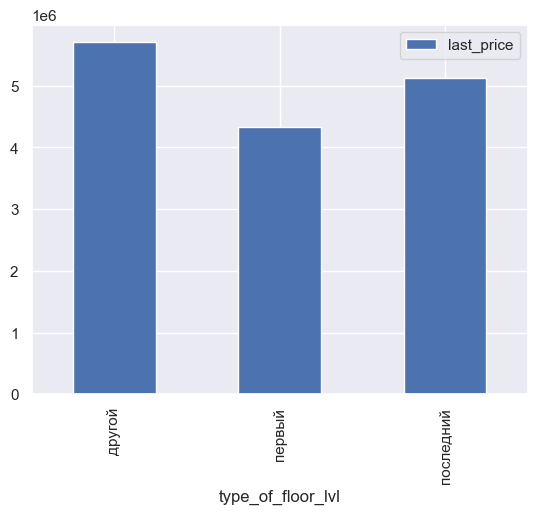

In [104]:
data.pivot_table(index='type_of_floor_lvl', values='last_price').plot.bar();

Стредняя стоимость для объвления на "других" этажах оказалась самой высокой.

Первые этажи стоят дешевле всего.

Разница стоимости между трёмя категориям одинаковая.

**даты размещения**

In [105]:
data['first_day_exposition_processing'] = data['week_day'].astype(str) + '/' + data['month'].astype(str) + '/' + data['year'].astype(str)
data['first_day_exposition_processing']

0         3/3/2019
1        1/12/2018
2         3/8/2015
4         1/6/2018
5         0/9/2018
           ...    
23693     4/8/2016
23695     0/1/2018
23696     6/2/2018
23697     1/3/2017
23698     4/7/2017
Name: first_day_exposition_processing, Length: 22686, dtype: object

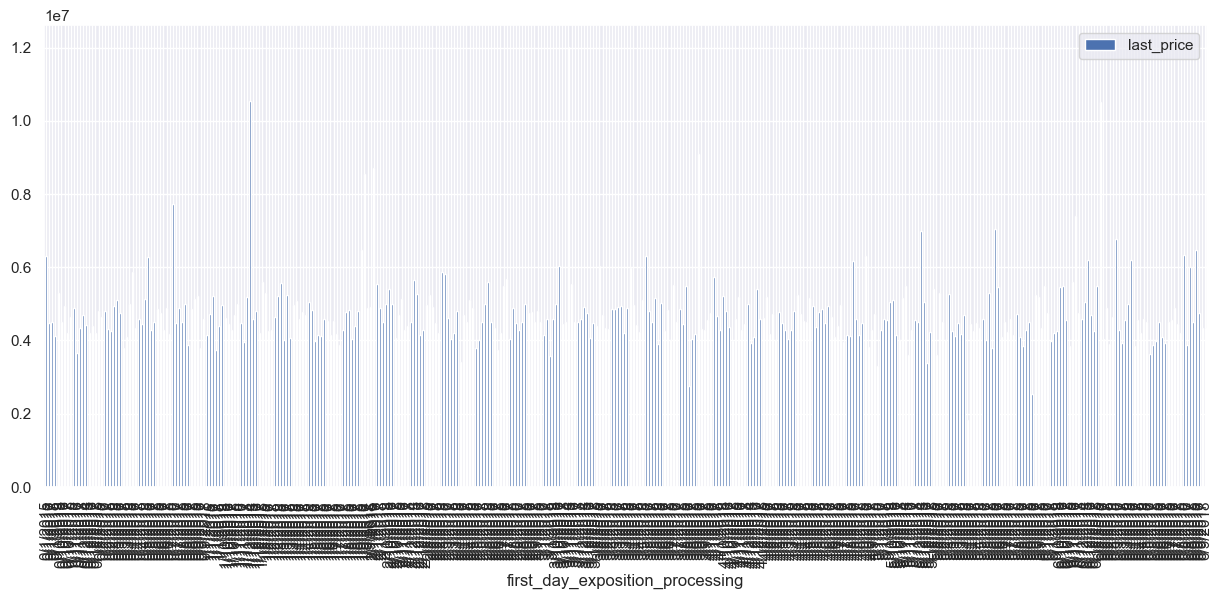

In [106]:
data.pivot_table(index='first_day_exposition_processing', values='last_price', aggfunc='median').plot.bar(figsize=(15,6));

In [107]:
data.pivot_table(index='first_day_exposition_processing', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)

,last_price
first_day_exposition_processing,
3/11/2014,12015500.0
1/12/2014,10543500.0
6/2/2015,10500000.0
3/9/2015,9100000.0
2/1/2015,8700000.0
...,...
5/12/2016,3390000.0
5/1/2015,3300000.0
3/8/2016,2760000.0


Четверг ноября 2014 года - период, когда создавались самые дорогие объявления

Суббота апреля 2015 года - период, когда создавались самые дешевые объявления

In [108]:
data.pivot_table(index='week_day', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)

,last_price
week_day,
1,4638000.0
2,4550000.0
0,4522000.0
3,4500000.0
4,4500000.0
5,4500000.0
6,4499000.0


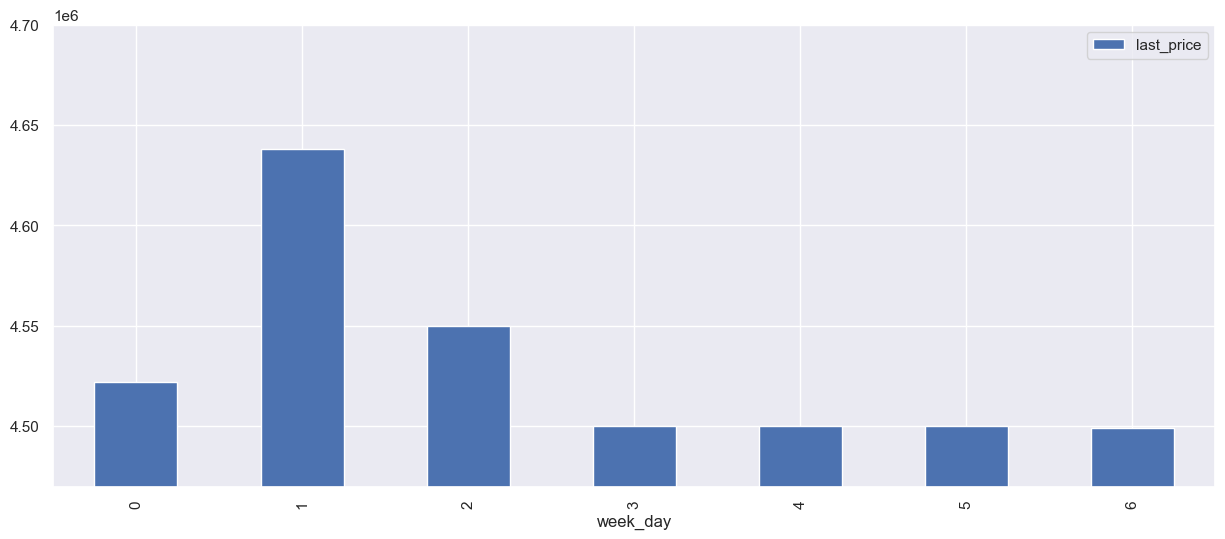

In [109]:
data.pivot_table(index='week_day', values='last_price', aggfunc='median').plot.bar(ylim=(4470000,4700000), figsize=(15,6));

In [110]:
data.pivot_table(index='month', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)

,last_price
month,
4,4700000.0
9,4590000.0
12,4589500.0
11,4550000.0
3,4512000.0
1,4500000.0
2,4500000.0
7,4500000.0
8,4500000.0


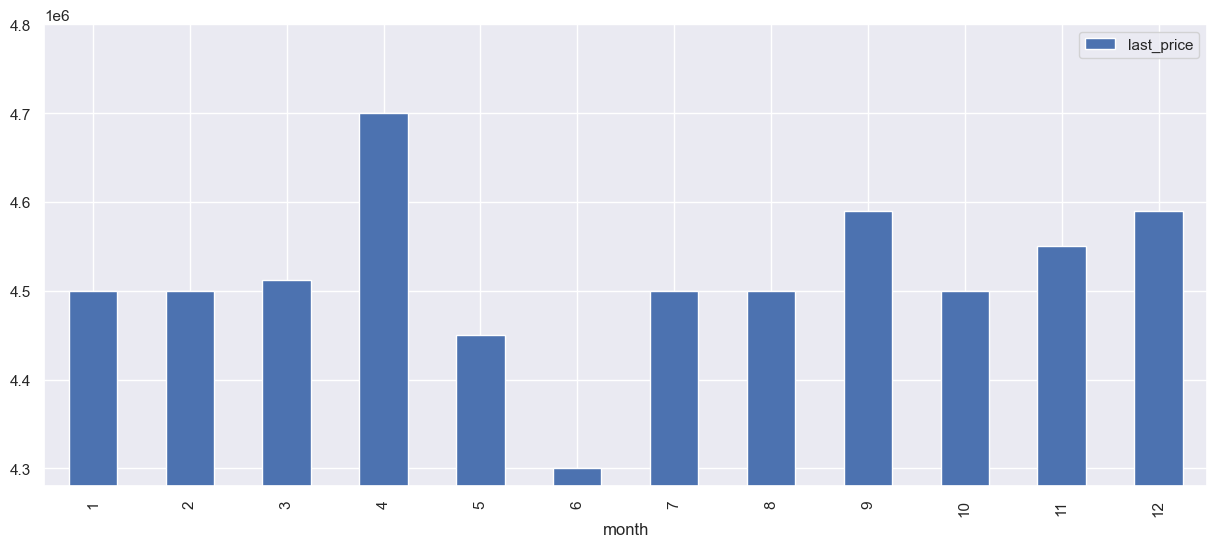

In [111]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot.bar(ylim=(4280000,4800000), figsize=(15,6));

In [112]:
data.pivot_table(index='year', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)

,last_price
year,
2014,6260000.0
2015,5067000.0
2019,4960000.0
2018,4500000.0
2016,4400000.0
2017,4400000.0


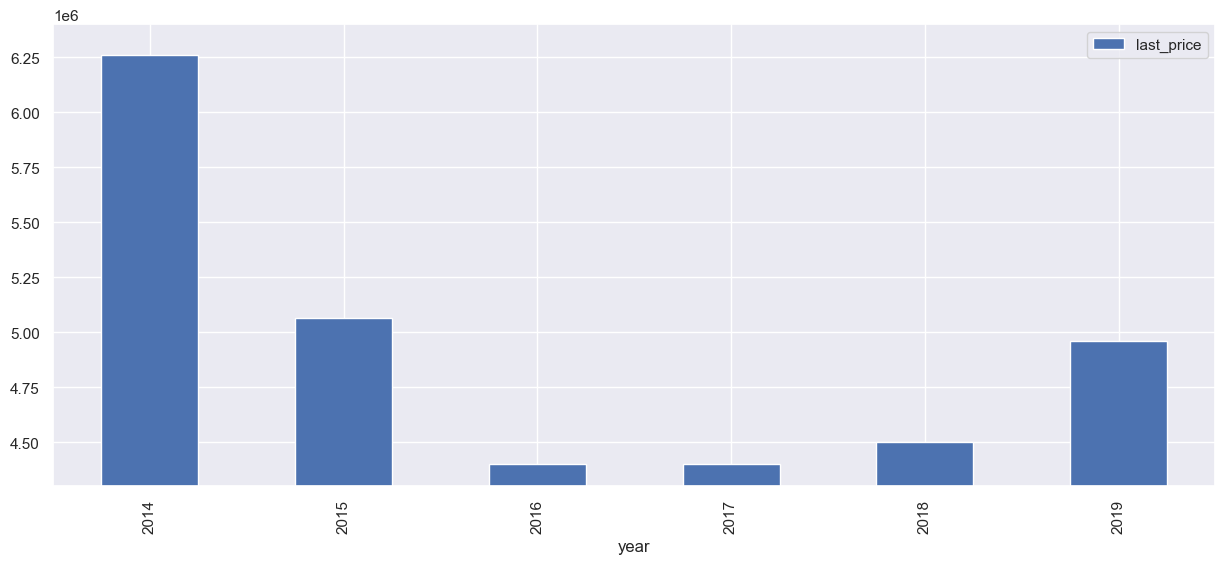

In [113]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot.bar(ylim=(4300000,6400000), figsize=(15,6));

Составим чарт, когда создавались **самые дорогие** объявления:
- вторники 4'638'000 ₽
- апрель 4'700'000 ₽
- 2014 год 6'260'000 ₽

**Самые дешевые** ообъявления:
- с четверга по воскресенье ~ 4'500'000 ₽
- июнь ~ 4'500'000 ₽
- 2016 и 2017 года ~ 4'400'000 ₽


Данные по дням недели различаются не так сильно, как разница по годам

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Создадим сводную таблицу

In [114]:
locality_name_mean = data.pivot_table(index='locality_name', values='cost_per_mert', aggfunc=['count','mean'])

In [115]:
locality_name_mean

,count,mean
,cost_per_mert,cost_per_mert
locality_name,,
бокситогорск,16,17551.591819
волосово,36,40183.325974
волхов,111,35087.679877
всеволожск,396,68662.937264
выборг,232,58226.968209
...,...,...
сосновый бор,85,75274.104503
сясьстрой,24,34405.425838


Уберем один уровень названия колонок

In [116]:
locality_name_mean.columns = locality_name_mean.columns.droplevel(1)

Сортируем данные по уменьшению количества объявлений, отбираем первые 10 значений. Следом сортируем данные по стоимости кв. метра. Выведем результат на экран

In [117]:
locality_name_mean = locality_name_mean.sort_values(by='count', ascending=False).head(10)
locality_name_mean = locality_name_mean.sort_values(by='mean', ascending=False)
locality_name_mean

,count,mean
locality_name,,
санкт-петербург,14792,111384.655302
пушкин,352,103004.641345
деревня кудрово,299,92473.547576
поселок парголово,326,90332.263023
поселок мурино,554,85763.043362
поселок шушары,438,78711.175344
колпино,335,75420.730509
гатчина,304,68919.469270
всеволожск,396,68662.937264


In [118]:
print(f"Самая высокая средняя цена квадратного метра {round(locality_name_mean['mean'].head(1)[0],2)} ₽ в населенном пункте: {locality_name_mean.index[0]}")

Самая высокая средняя цена квадратного метра 111384.66 ₽ в населенном пункте: санкт-петербург


In [119]:
print(f"Самая низкая средняя цена квадратного метра {round(locality_name_mean['mean'].tail(1)[0],2)} ₽ в населенном пункте: {locality_name_mean.index[9]}")

Самая низкая средняя цена квадратного метра 58226.97 ₽ в населенном пункте: выборг


#### вычислите среднюю цену каждого километра в Санкт-Петербурге

In [120]:
spb_kilometer_cost = data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='cost_per_mert', aggfunc='mean')

In [121]:
spb_kilometer_cost.head()

,cost_per_mert
cityCenters_nearest_km,
0.0,205859.310149
1.0,147475.946263
2.0,142145.551952
3.0,120559.289834
4.0,129349.691726


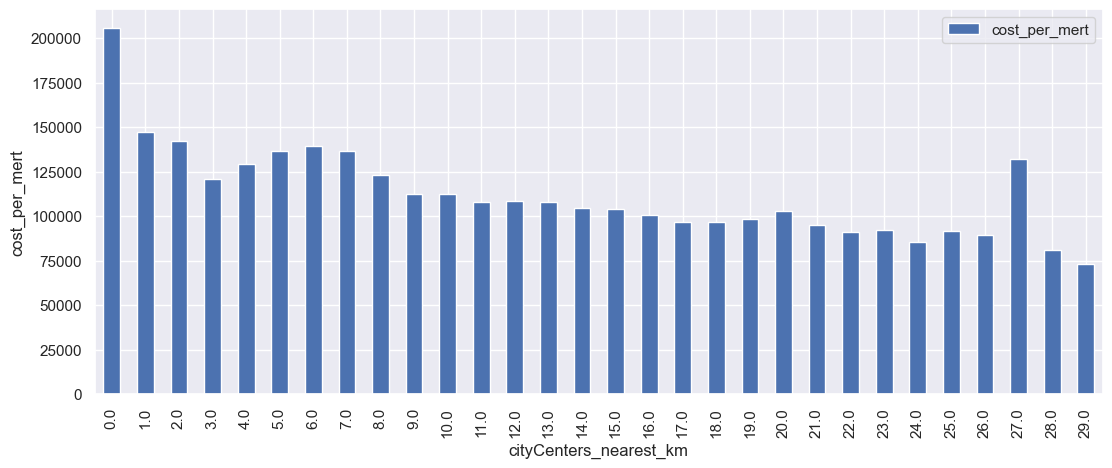

In [122]:
spb_kilometer_cost.plot(
    kind='bar',
    ylabel='cost_per_mert',
    grid=True,
    legend=True,
    figsize=(13,5));

Очевидно и предсказуемо, что чем ближе к центру, тем квадратный метр дороже
Но на 3 км происходит падение, а так же есть аномальный пик на 27 км.

Возможно это следствие неправильной обработки данных, а быть может есть какой-то жилой комплекс высокого класс, где продают много квартир

### Общий вывод

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22686 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_images                     22686 non-null  int64  
 1   last_price                       22686 non-null  float64
 2   total_area                       22686 non-null  float64
 3   first_day_exposition             22686 non-null  object 
 4   rooms                            22686 non-null  int64  
 5   ceiling_height                   22686 non-null  float64
 6   floors_total                     22686 non-null  int64  
 7   living_area                      20899 non-null  float64
 8   floor                            22686 non-null  int64  
 9   is_apartment                     22686 non-null  bool   
 10  studio                           22686 non-null  bool   
 11  open_plan                        22686 non-null  bool   
 12  kitchen_area      

In [124]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,22686.0,9.800582e+00,5.623888e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,22686.0,5.451635e+06,3.705030e+06,12190.000000,3.390000e+06,4.500000e+06,6.400000e+06,4.950000e+07
total_area,22686.0,5.511985e+01,2.061579e+01,12.000000,3.960000e+01,5.060000e+01,6.620000e+01,1.297000e+02
rooms,22686.0,1.955479e+00,8.911940e-01,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
ceiling_height,22686.0,2.717385e+00,2.583237e-01,1.000000,2.600000e+00,2.730849e+00,2.730849e+00,2.000000e+01
floors_total,22686.0,1.078978e+01,6.632932e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,20899.0,3.144992e+01,1.398488e+01,2.000000,1.831500e+01,3.000000e+01,4.070000e+01,1.000000e+02
floor,22686.0,5.923609e+00,4.912273e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,20736.0,9.946182e+00,4.742134e+00,0.000000,7.000000e+00,9.000000e+00,1.140000e+01,6.400000e+01
balcony,22686.0,5.968879e-01,9.560900e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Данные, которые мы использовали, содержали пропуски.

Часть данных мы получили путём анализа самих данных. Например "высота потолка" - часть данных была в 10 раз больше нормы. Данные о "балконах" - люди просто забывали указать, что балкона нет... Если балкона нет, зачем мне ставить галку "нет балкона"? :) Так же мы нашли связанную друг с другом отсутствующую "картографическую информацию". Не всё из этого можно было восстановить. Где-то мы группировали данные по населенным пунктам и выводили среднее значение для пропусков. Сами населенные пункты - их названия пришлось обработать, чтобы уменьшить дубликаты. Недостающую длинну потолков взяли, как среднее значение от имеющихся данных. Аномальные данные по цене, общей площади и количеству комнат мы отбросили, таким образом мы уменьшили данные примерно на 5%


Обработав данные, мы выяснили, что:

- самые популярные дома с 5 и 9 этажами
- самые дорогие этажи - не первые и не последние - на первом месте категоряи "другой"
- чем ближе к парку и водоёму - тем дороже
- самые дорогие объявения сделаны в 2016 году


**Главный итог:**

- самый дорогой квадратный метр в Санкт-Петербурге, причём чем ближе к центру, чем дороже. Мы и не удивлены!

- так же мы обнаружили связь общей площади, жилой площади и площади кухни со стоимостью: больше площадь - дороже квадратный метр

- в среднем квартира продавалась за 90 дней. Быстрые продажи до 45 дней, долгие - 232 дня
